### Import libraries

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load the dataset

In [91]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [92]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


#### Dataset dimensions

In [93]:
print('Training data: \nRows: {} Columns: {}'.format(train.shape[0],train.shape[1]))

Training data: 
Rows: 550068 Columns: 12


In [94]:
print('Testing data: \nRows: {} Columns: {}'.format(test.shape[0],test.shape[1]))

Testing data: 
Rows: 233599 Columns: 11


#### Datatype info

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#### Statistical summary

In [96]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


#### Unique values

In [97]:
train.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

### Descriptive Analysis

#### Missing values

In [98]:
round(train.isnull().sum()/len(train)*100,2)

User_ID                        0.00
Product_ID                     0.00
Gender                         0.00
Age                            0.00
Occupation                     0.00
City_Category                  0.00
Stay_In_Current_City_Years     0.00
Marital_Status                 0.00
Product_Category_1             0.00
Product_Category_2            31.57
Product_Category_3            69.67
Purchase                       0.00
dtype: float64

##### There are lot of null values in Product Category 3, so will drop the column

#### Checking unique values for Age

In [99]:
round((train['Age'].value_counts(normalize = True).mul(100)),2)

26-35    39.92
36-45    20.00
18-25    18.12
46-50     8.31
51-55     7.00
55+       3.91
0-17      2.75
Name: Age, dtype: float64

#### Checking unique values for Stay years

In [100]:
round((train['Stay_In_Current_City_Years'].value_counts(normalize= True)).mul(100),2)

1     35.24
2     18.51
3     17.32
4+    15.40
0     13.53
Name: Stay_In_Current_City_Years, dtype: float64

##### The features contain 55+ and 4+ values which needs to be cleaned

### Univariate Analysis

#### Purchase Amount

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

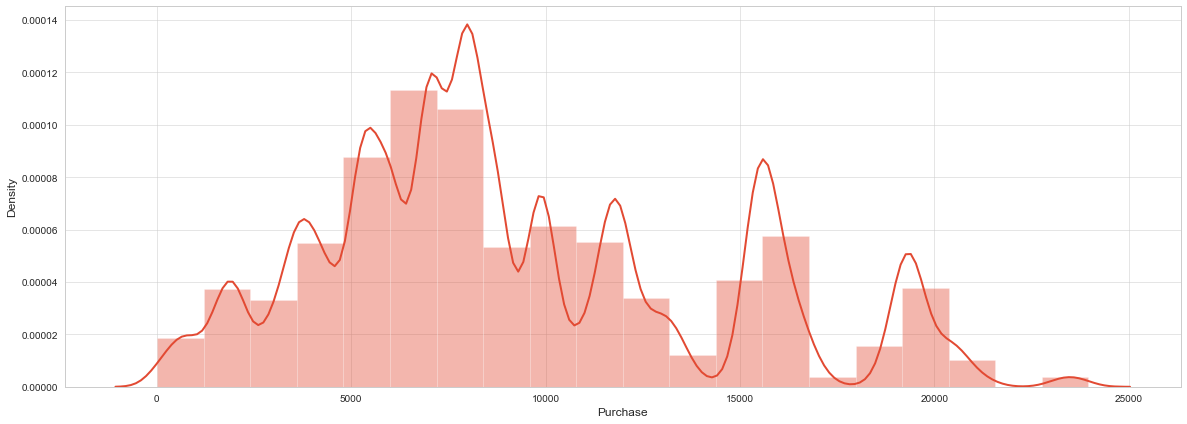

In [202]:
plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.figure(figsize=(20,7))
sns.distplot(train['Purchase'], bins = 20)

#### Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

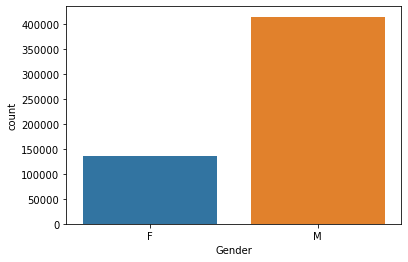

In [16]:
sns.countplot(x='Gender',data=train)

#### City Category

(-1.2419644017349611,
 1.1067602096064266,
 -1.1663265947748922,
 1.1281193517266157)

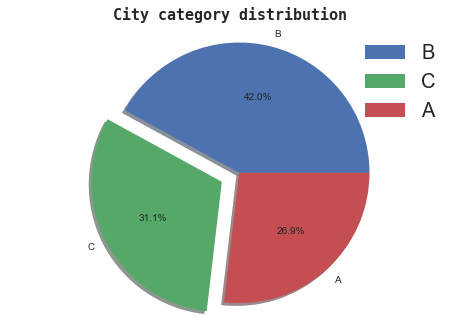

In [17]:
city = train['City_Category'].value_counts()

plt.style.use('seaborn')
plt.pie(city.values, labels = city.index,explode = (0 , 0.15, 0), shadow = True,autopct = '%1.1f%%')
plt.title('City category distribution',  fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')

#### Age

(-1.1225795460341446,
 1.1023075507884754,
 -1.112678915938425,
 1.113634773136341)

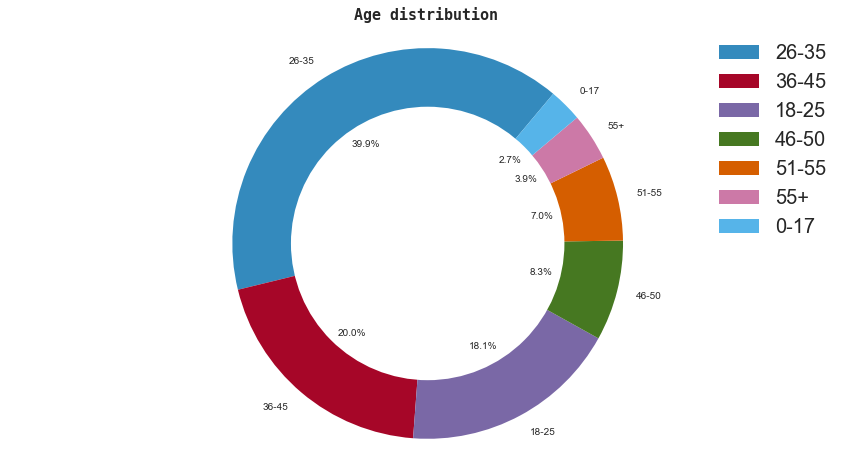

In [23]:
age = train['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (15, 8))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')

centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Age distribution',  fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')

<AxesSubplot:xlabel='Age', ylabel='count'>

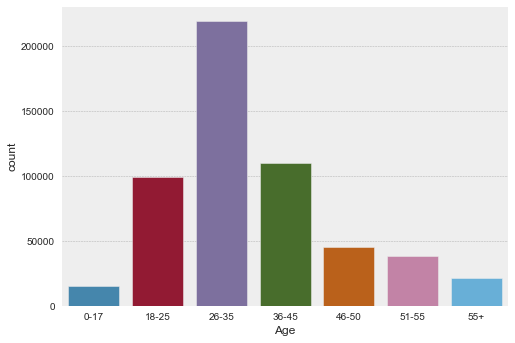

In [166]:
order = ['0-17', '18-25', '26-35','36-45','46-50','51-55','55+']
sns.countplot(x='Age', data=train, order = order)

#### Occupation

<AxesSubplot:xlabel='Occupation', ylabel='count'>

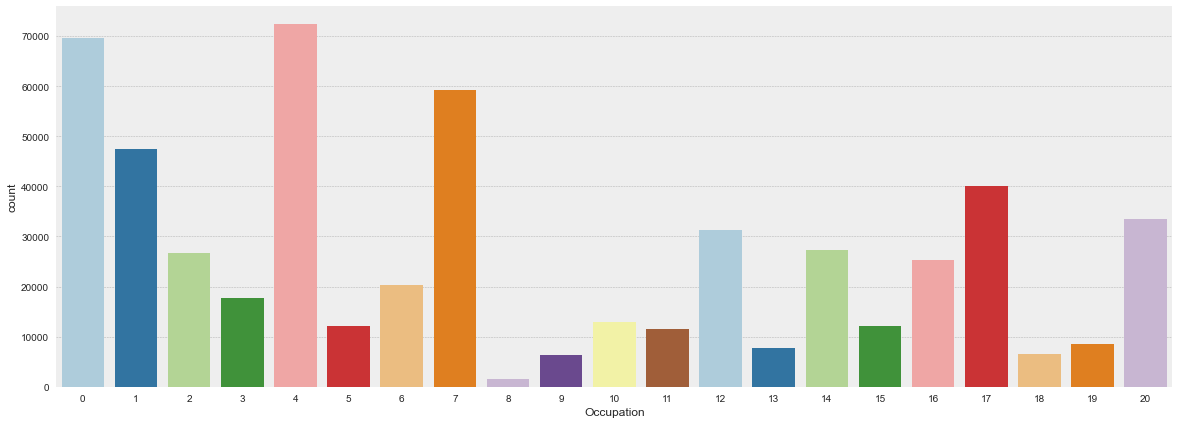

In [24]:
plt.figure(figsize = (20, 7))
sns.countplot(x='Occupation',data=train,palette='Paired')

#### Marital Status

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

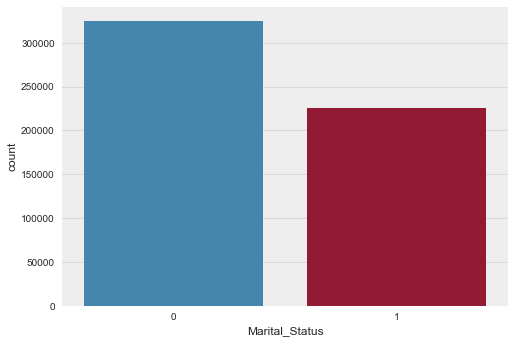

In [25]:
sns.countplot(x='Marital_Status',data=train)

#### Stay in Current City

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

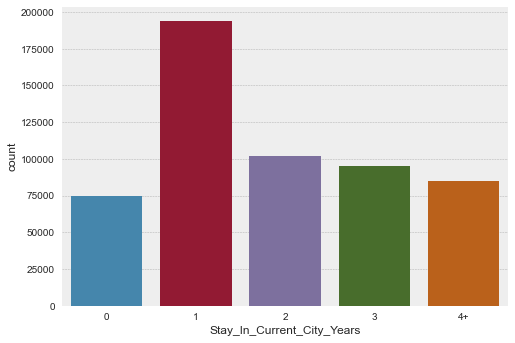

In [26]:
order = ['0','1','2','3','4+']
sns.countplot(x='Stay_In_Current_City_Years', data=train, order =order)

##### Observations

### Bivariate Analysis

#### Purchase vs Ocuupation

Text(0.5, 1.0, 'Purchase amount across Occupation')

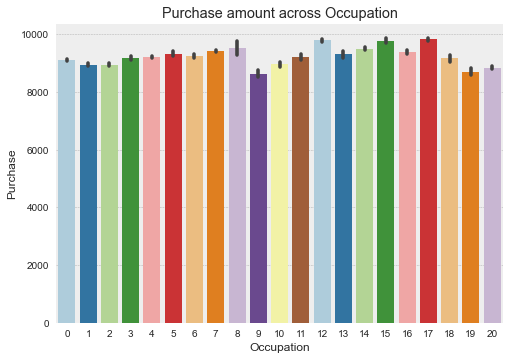

In [30]:
sns.barplot(data=train, x='Occupation', y='Purchase', palette='Paired')
plt.title('Purchase amount across Occupation')

#### Purchase vs Age

Text(0.5, 1.0, 'Purchase amount across Age')

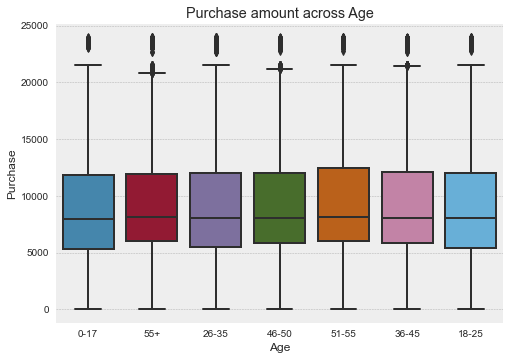

In [39]:
sns.boxplot(x ='Age', y='Purchase',data=train)
plt.title('Purchase amount across Age')

#### Purchase vs Gender

Text(0.5, 1.0, 'Purchase amount across Gender')

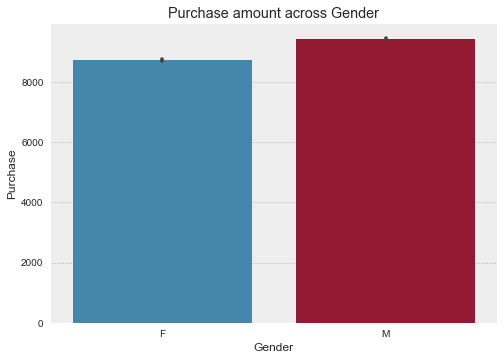

In [33]:
sns.barplot(x='Gender', y= 'Purchase',data=train)
plt.title('Purchase amount across Gender')

#### Purchase vs City Category

Text(0.5, 1.0, 'Purchase amount across City Category')

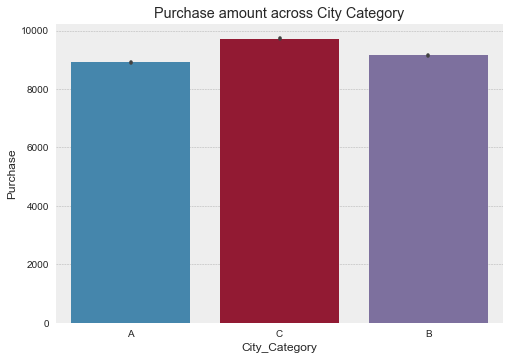

In [34]:
sns.barplot(x='City_Category', y= 'Purchase',data= train)
plt.title('Purchase amount across City Category')

#### Purchase vs Product Category 1

Text(0.5, 1.0, 'Purchase amount across Product Category 1')

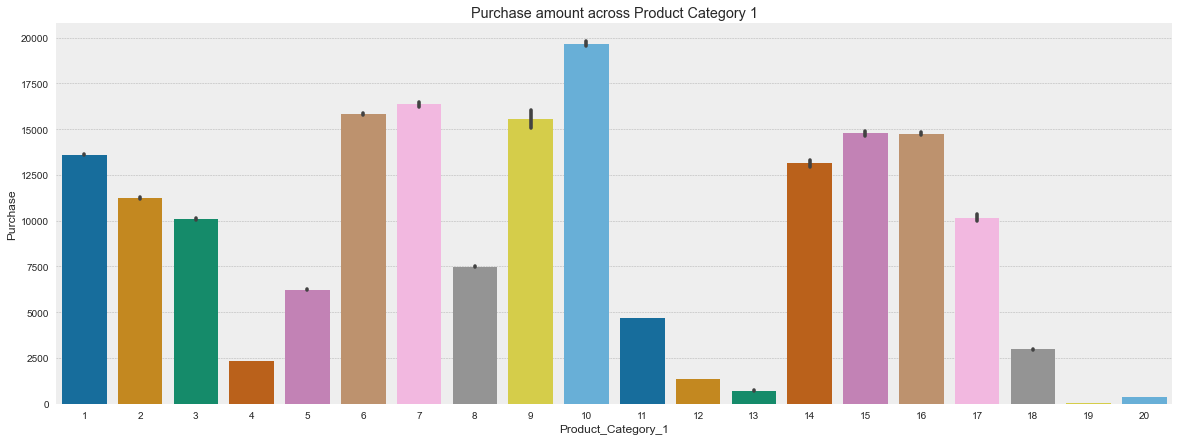

In [35]:
plt.figure(figsize = (20, 7))
sns.barplot(x ='Product_Category_1', y= 'Purchase',data=train, palette='colorblind')
plt.title('Purchase amount across Product Category 1')

#### Purchase vs Marital Status

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

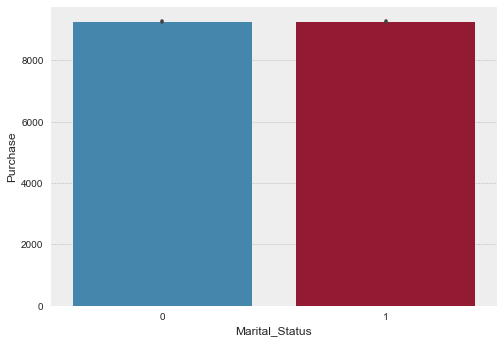

In [36]:
sns.barplot(x='Marital_Status', y='Purchase', data=train)

##### Observations

### Multivariate Analysis

<AxesSubplot:>

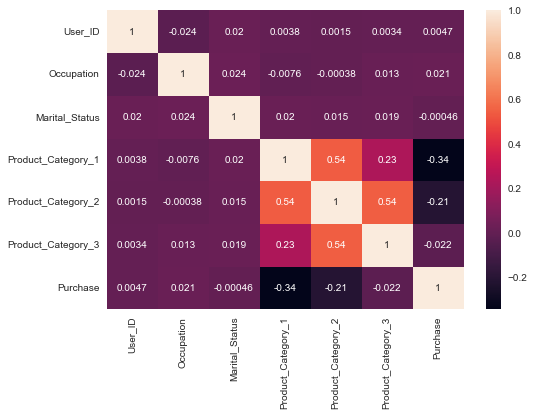

In [37]:
sns.heatmap(train.corr(), annot = True)

#### Merging the dataframes

In [101]:
train['source'] = 'train'
test['source'] = 'test'

In [102]:
df = pd.concat([train,test])
df.shape

(783667, 13)

#### Data Cleaning

In [103]:
df['Age'] = df['Age'].apply(lambda x: str(x).replace('55+','55'))
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(lambda x: str(x).replace('4+','4'))

#### Dropping unnecessary columns

In [104]:
df.drop(['Product_Category_3','User_ID','Product_ID'],axis=1,inplace=True)

In [105]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,source
0,F,0-17,10,A,2,0,3,NaN,8370.0,train
1,F,0-17,10,A,2,0,1,6.0,15200.0,train
2,F,0-17,10,A,2,0,12,NaN,1422.0,train
3,F,0-17,10,A,2,0,12,14.0,1057.0,train
4,M,55,16,C,4,0,8,NaN,7969.0,train


### Encoding

In [106]:
from sklearn.preprocessing import LabelEncoder

variables = ['Age','Gender','City_Category']

for var in variables:
    df[var] = LabelEncoder().fit_transform(df[var])

In [107]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,source
0,0,0,10,0,2,0,3,NaN,8370.0,train
1,0,0,10,0,2,0,1,6.0,15200.0,train
2,0,0,10,0,2,0,12,NaN,1422.0,train
3,0,0,10,0,2,0,12,14.0,1057.0,train
4,1,6,16,2,4,0,8,NaN,7969.0,train


#### Missing values

In [123]:
df['Product_Category_2'].fillna(df['Product_Category_2'].mode().iloc[0], inplace=True)

#### Changing datatype

In [124]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

#### Separating features and target column

In [125]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

In [126]:
train.drop('source', axis = 1, inplace = True)
test.drop('source', axis = 1, inplace = True)

In [127]:
X = train.drop('Purchase',axis=1)
Y = train['Purchase']

### Feature Selection

In [128]:
from sklearn.ensemble import ExtraTreesRegressor
selector = ExtraTreesRegressor()

In [131]:
selector.fit(X, Y)

ExtraTreesRegressor()

<AxesSubplot:title={'center':'Feature Importance'}>

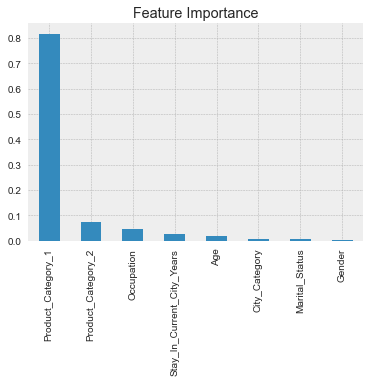

In [132]:
feature_imp = pd.Series(selector.feature_importances_, X.columns).sort_values(ascending=False)
feature_imp.plot(kind='bar', title='Feature Importance')

#### Dropping less important features

In [135]:
X.drop(['Gender', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)

### Feature Scaling

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [137]:
var1 = ['Stay_In_Current_City_Years','Product_Category_1','Product_Category_2']
for var in var1:
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

In [138]:
X.head()

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2
0,0,10,2,3,8.0
1,0,10,2,1,6.0
2,0,10,2,12,8.0
3,0,10,2,12,14.0
4,6,16,4,8,8.0


### Train - Test Split

In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### Modelling

In [145]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)

In [146]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)

In [147]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)

In [148]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

In [149]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 42)
xgb.fit(X_train, Y_train)
Y_pred_xgb = xgb.predict(X_test)

### Comparing RMSE and R squared for all models

In [150]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [159]:
models = [lr, knn, dt, rf, xgb] 
model_names = ["Linear Regression", "KNN Regression", "Decision Tree Regression", "Random Forest Regression", 
               "XGB Regression"]

for model, model_name in zip(models, model_names):
    Y_pred = model.predict(X_test)  
    rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
    r2 = r2_score(Y_test, Y_pred)
    
    print(f"{model_name}:")
    print("RMSE:", rmse)
    print("R2 score:", r2)
    print("_____________________________")

Linear Regression:
RMSE: 4702.063770423308
R2 score: 0.12006505765729436
_____________________________
KNN Regression:
RMSE: 3281.490400105632
R2 score: 0.5714358780526987
_____________________________
Decision Tree Regression:
RMSE: 3067.1401009793285
R2 score: 0.625595756312464
_____________________________
Random Forest Regression:
RMSE: 3035.360647421933
R2 score: 0.6333141655391312
_____________________________
XGB Regression:
RMSE: 2986.0170725552225
R2 score: 0.645139134674023
_____________________________


### Hyperparameter tuning

In [166]:
from sklearn.model_selection import RandomizedSearchCV

In [167]:
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
min_child_weight = [int(x) for x in np.linspace(start = 45, stop = 70, num = 15)]

In [168]:
params = {
 "learning_rate"    : learning_rate,
 "max_depth"        : max_depth,
 "min_child_weight" : min_child_weight,
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}

In [169]:
xgb_tune = XGBRegressor(verbosity = 0, random_state = 42)

In [170]:
xgb_cv = RandomizedSearchCV(xgb_tune, param_distributions = params, cv = 5, random_state = 42)

In [171]:
xgb_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': ['0.01', '0.05', '0.1',
                                                          '0.25', '0.5', '0.75',
                                                          '1.0'],
                                        'max_depth': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      20],
                                        'min_child_weight': [45, 46, 48, 50, 52,
                                                             53, 55, 57, 59, 61,
                                                             62, 64, 66, 68,
                                                             70]},
                   random_state=42)

In [172]:
xgb_cv.best_score_

0.6505028671941364

In [173]:
xgb_cv.best_params_

{'min_child_weight': 66,
 'max_depth': 11,
 'learning_rate': '1.0',
 'gamma': 0.3,
 'colsample_bytree': 0.7}

### Rebuilding Model

In [174]:
xgb_best = XGBRegressor(colsample_bytree = 0.7, gamma = 0.3, learning_rate = 1.0, max_depth = 11, min_child_weight = 66, 
                        verbosity = 0,random_state=0)

xgb_best.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=66, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [175]:
Y_pred_xgb_best = xgb_best.predict(X_test)

In [176]:
print("XGB regression: ")
print("RMSE:",np.sqrt(mean_squared_error(Y_test, Y_pred_xgb_best)))
print("R2 score:", r2_score(Y_test, Y_pred_xgb_best))

XGB regression: 
RMSE: 2989.463186984966
R2 score: 0.6443195835607145
